In [1]:
import numpy as np
import datetime
from netCDF4 import Dataset
import itertools
import matplotlib.pyplot as plt
from matplotlib import gridspec
import tqdm
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

In [2]:
snow = 'SMLG_ERA5'

In [39]:
datapath = '/Users/carmennab/Dropbox/alpha_retracker/data/sit/'
names = ['CPOM','AWI']
alphas = np.arange(0,101)
all_means = {}
for name in names:
    means = np.full(101,np.nan)
    for alpha in alphas:
        a = np.asarray(Dataset(datapath+snow+'_'+name+'/ULS_A/a'+str(alpha)+'.nc')['Sea Ice Thickness'])
        b = np.asarray(Dataset(datapath+snow+'_'+name+'/ULS_B/a'+str(alpha)+'.nc')['Sea Ice Thickness'])
        d = np.asarray(Dataset(datapath+snow+'_'+name+'/ULS_D/a'+str(alpha)+'.nc')['Sea Ice Thickness'])
        means[alpha] = np.nanmean((a,b,d)) 
    all_means[name] = means

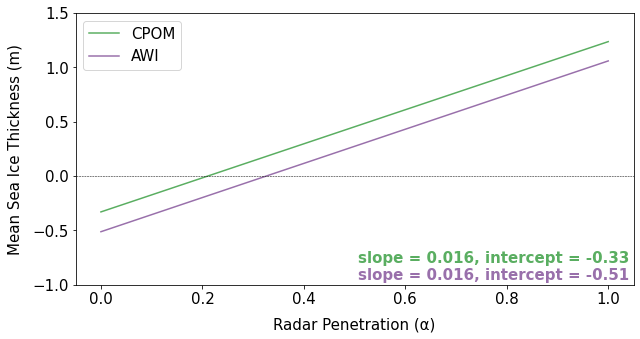

In [55]:
fig = plt.figure(figsize=(10,5))
plt.rc('font', size=15)
spec = gridspec.GridSpec(ncols=1, nrows=1)
ax = plt.subplot(spec[0])
ax.plot(alphas/100,all_means['CPOM'],label='CPOM',color='#5aae61')
slope,intercept = np.polyfit(alphas,all_means['CPOM'],1)
ax.text(0.75, 0.08, f"slope = {slope:.3f}, intercept = {intercept:.2f}", ha='center',color='#5aae61',
        weight='bold',transform = ax.transAxes)  

ax.plot(alphas/100,all_means['AWI'],label='AWI',color='#9970ab')
slope,intercept = np.polyfit(alphas,all_means['AWI'],1)
ax.text(0.75, 0.02, f"slope = {slope:.3f}, intercept = {intercept:.2f}", ha='center',color='#9970ab',
        weight='bold',transform = ax.transAxes)    
ax.legend()
ax.set_ylim([-1,1.5])
#ax.set_xlim([0,1])
ax.set_ylabel('Mean Sea Ice Thickness (m)',labelpad=10)
ax.set_xlabel('Radar Penetration (\u03B1)',labelpad=10)
ax.axhline(0,linestyle='dashed',color='black',linewidth=0.5)
plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Alpha Retracker/supp_figs/sit_vs_alpha.jpg',
            bbox_inches = "tight", dpi = 400)